<a href="https://colab.research.google.com/github/mingyu1021/AI-class/blob/main/3week/3week_weather_rainfall.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score


# -----------------------------
# 1) 데이터 준비
# -----------------------------


df = pd.read_csv("/content/drive/MyDrive/AI-class/weather.csv")

df

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RISK_MM,RainTomorrow
0,11/1/2007,Canberra,8.0,24.3,0.0,3.4,6.3,NW,30.0,SW,...,29,1019.7,1015.0,7,7,14.4,23.6,No,3.6,Yes
1,11/2/2007,Canberra,14.0,26.9,3.6,4.4,9.7,ENE,39.0,E,...,36,1012.4,1008.4,5,3,17.5,25.7,Yes,3.6,Yes
2,11/3/2007,Canberra,13.7,23.4,3.6,5.8,3.3,NW,85.0,N,...,69,1009.5,1007.2,8,7,15.4,20.2,Yes,39.8,Yes
3,11/4/2007,Canberra,13.3,15.5,39.8,7.2,9.1,NW,54.0,WNW,...,56,1005.5,1007.0,2,7,13.5,14.1,Yes,2.8,Yes
4,11/5/2007,Canberra,7.6,16.1,2.8,5.6,10.6,SSE,50.0,SSE,...,49,1018.3,1018.5,7,7,11.1,15.4,Yes,0.0,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
361,10/27/2008,Canberra,9.0,30.7,0.0,7.6,12.1,NNW,76.0,SSE,...,15,1016.1,1010.8,1,3,20.4,30.0,No,0.0,No
362,10/28/2008,Canberra,7.1,28.4,0.0,11.6,12.7,N,48.0,NNW,...,22,1020.0,1016.9,0,1,17.2,28.2,No,0.0,No
363,10/29/2008,Canberra,12.5,19.9,0.0,8.4,5.3,ESE,43.0,ENE,...,47,1024.0,1022.8,3,2,14.5,18.3,No,0.0,No
364,10/30/2008,Canberra,12.5,26.9,0.0,5.0,7.1,NW,46.0,SSW,...,39,1021.0,1016.2,6,7,15.8,25.9,No,0.0,No


In [ ]:
# 결측치 확인
df.isnull().sum()

,0
Date,0
Location,0
MinTemp,0
MaxTemp,0
Rainfall,0
Evaporation,0
Sunshine,3
WindGustDir,3
WindGustSpeed,2
WindDir9am,31


In [ ]:
# 결측치 제거
df = df.dropna()
df.isnull().sum()

,0
Date,0
Location,0
MinTemp,0
MaxTemp,0
Rainfall,0
Evaporation,0
Sunshine,0
WindGustDir,0
WindGustSpeed,0
WindDir9am,0


In [ ]:
# 모든 레이블을 숫자로 변형

from sklearn.preprocessing import LabelEncoder

label_encoders = {}
for column in df.columns:
    label_encoders[column] = LabelEncoder()
    df[column] = label_encoders[column].fit_transform(df[column])

df

/tmp/ipython-input-64023483.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[column] = label_encoders[column].fit_transform(df[column])
/tmp/ipython-input-64023483.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[column] = label_encoders[column].fit_transform(df[column])
/tmp/ipython-input-64023483.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https:/

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RISK_MM,RainTomorrow
0,59,0,90,111,0,15,43,7,8,12,...,15,93,82,7,7,95,129,0,16,1
1,70,0,138,130,16,20,75,1,12,0,...,22,37,27,5,3,123,145,1,16,1
2,81,0,135,106,16,27,24,7,33,3,...,55,20,22,8,7,103,99,1,43,1
3,83,0,133,42,43,34,69,7,20,14,...,42,7,21,2,7,88,50,1,13,1
4,84,0,86,46,13,26,84,10,18,10,...,35,84,113,7,7,68,60,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
361,47,0,100,152,0,36,99,6,29,10,...,2,64,46,1,3,148,167,0,0,0
362,48,0,81,141,0,51,104,3,17,6,...,8,95,98,0,1,120,160,0,0,0
363,49,0,125,78,0,40,36,2,14,1,...,33,131,147,3,2,96,81,0,0,0
364,51,0,125,130,0,23,50,7,16,11,...,25,103,91,6,7,107,146,0,0,0


In [ ]:
# 입력과 출력 분리
y = df["Rainfall"]
X = df.drop(columns=["RainTomorrow", "Rainfall"])



In [ ]:
X

,Date,Location,MinTemp,MaxTemp,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,...,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RISK_MM
0,59,0,90,111,15,43,7,8,12,7,...,29,15,93,82,7,7,95,129,0,16
1,70,0,138,130,20,75,1,12,0,13,...,41,22,37,27,5,3,123,145,1,16
2,81,0,135,106,27,24,7,33,3,5,...,43,55,20,22,8,7,103,99,1,43
3,83,0,133,42,34,69,7,20,14,13,...,23,42,7,21,2,7,88,50,1,13
4,84,0,86,46,26,84,10,18,10,2,...,29,35,84,113,7,7,68,60,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
361,47,0,100,152,36,99,6,29,10,7,...,1,2,64,46,1,3,148,167,0,0
362,48,0,81,141,51,104,3,17,6,6,...,6,8,95,98,0,1,120,160,0,0
363,49,0,125,78,40,36,2,14,1,1,...,24,33,131,147,3,2,96,81,0,0
364,51,0,125,130,23,50,7,16,11,14,...,30,25,103,91,6,7,107,146,0,0


In [ ]:
y

,Rainfall
0,0
1,16
2,16
3,43
4,13
...,...
361,0
362,0
363,0
364,0


In [ ]:
# 훈련과 테스트 데이터 분리


X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, shuffle=True, random_state=12
)

In [ ]:
X_train

,Date,Location,MinTemp,MaxTemp,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,...,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RISK_MM
321,307,0,30,31,26,68,1,3,11,6,...,30,29,153,142,7,1,37,46,0,0
295,286,0,19,19,11,49,8,22,8,8,...,27,30,86,97,8,5,33,20,0,0
226,228,0,33,16,9,51,8,17,7,8,...,34,35,145,165,4,1,30,23,0,0
51,103,0,168,97,20,39,6,29,3,14,...,53,48,0,0,8,3,150,94,1,38
178,192,0,89,68,27,38,7,22,6,7,...,29,37,3,2,6,6,95,70,0,26
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
290,280,0,16,14,18,82,3,8,2,6,...,20,21,124,141,0,1,18,21,0,0
133,151,0,132,161,41,75,1,12,9,6,...,52,5,102,105,7,1,109,175,0,0
268,265,0,12,12,9,39,14,10,9,14,...,49,36,95,84,7,7,3,22,0,0
284,274,0,22,4,5,77,3,12,6,3,...,33,46,75,95,1,1,19,9,0,0


In [ ]:
y_train

,Rainfall
321,0
295,0
226,0
51,33
178,0
...,...
290,0
133,0
268,1
284,2


In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

model = LinearRegression()         # 모델 구성
model.fit(X_train, y_train)        # 모델 훈련
ly_preds = model.predict(X_test)   # 예측데이터 생성
print(mean_squared_error(y_test, ly_preds))  #평가

31.666905603201542


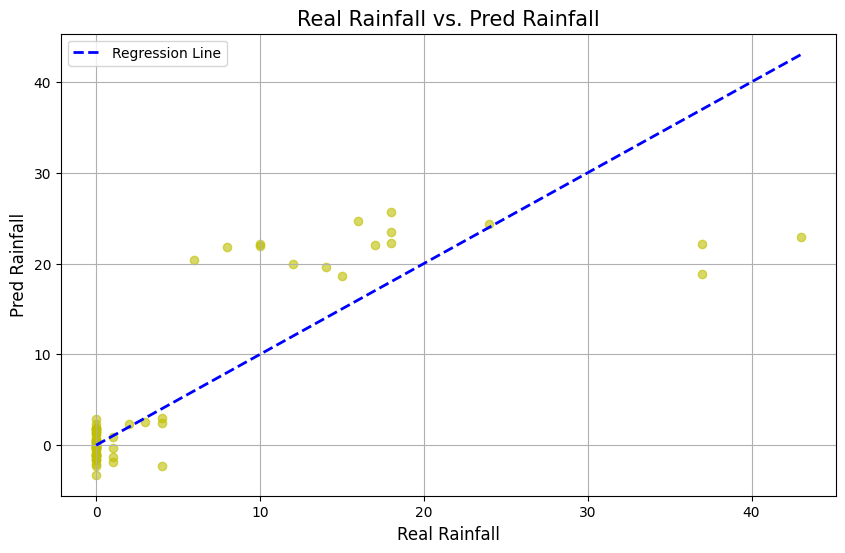

In [ ]:

# 예측값과 실제 값 차이를 산접도로 표시, 노란색 예측

import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.scatter(y_test, ly_preds, alpha=0.6, color='y')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'b--', lw=2, label='Regression Line')
plt.title('Real Rainfall vs. Pred Rainfall', fontsize=15)
plt.xlabel('Real Rainfall', fontsize=12)
plt.ylabel('Pred Rainfall', fontsize=12)
plt.legend()
plt.grid(True)
plt.show()